# Linear Regression Assignment
## Bike Sharing Case Study
### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Problem Approach :
1. Importing packages,Reading & Understanding Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Building Model 
6. Residual Analysis
7. Making Predictions
8. Model Evaluation
9. Recommendations to the Company

## Step 1: Importing packages Reading and Understanding Data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
%matplotlib inline
import datetime

# importing all required packages for building Linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Configuring maximum rows & columns 
pd.set_option("display.max_columns" , 300)

In [4]:
# Loading day.csv dataframe

bike_data = pd.read_csv('day.csv' , index_col = 'instant')

In [5]:
# Check the top 5 records of the bike_data 

bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check the bottom 5 records of the bike_data

bike_data.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
# Inspecting shape of the dataframe

bike_data.shape

(730, 15)

In [8]:
# Inspecting the no.of records, columns, data types, not null count records 

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
# Checking the column names:

bike_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [10]:
# Checking the statistical Summary of the dataset

bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insights:


## Step 2 : Data Cleaning 

### Step 2.1 Missing Values Identification:

In [11]:
# Check the Null values count in each varaible
bike_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inferences:
Data seems to be clean with out any Missing values. Hence missing values handling is not required for this bike_data dataset. 

### Step 2.2  Irrelevant Columns Elimination 

Reason : 
1. casual : count of casual users -> dropping 'causal' variable as the 'cnt' column is sum of 'casual' and 'registered' users.
2. registered: count of registered users -> dropping 'registered' as 'cnt' column addresses the sum of registered & casual users.


In [12]:
# Dropping the irrevelant variables from the dataset
bike_data = bike_data.drop(['casual','registered'] , axis = 1)

# Check the head of the bike_data
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2.3 Categorical Data Labelling:

In [13]:
# Check the unique values in each variable
bike_data.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Inferences :
1. season , mnth, weekday & weathersit columns have unique values & they have to be labelled as it will be further helpful for data preparation procecss.
2. season - 4, mnth -12, weekday -7 & weathersit -3

In [14]:
# Check the unique value & counts for the 'season' variable
bike_data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
# Renaming the 'season' variable data with reference to the data dictionary => 1:spring, 2:summer, 3:fall, 4:winter
def season_labels(x):
    return x.map({
        1:'Spring', 
        2:'Summer', 
        3:'Fall', 
        4:'Winter'        
    })
bike_data['season'] = bike_data[['season']].apply(season_labels)

In [16]:
# Check the unique value & counts for the 'mnth' variable
bike_data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
# Renaming the 'mnth' variable data with referencce to months ( 1 to 12)
def months(x):
    return x.map({
        1:'January', 
        2:'February', 
        3:'March', 
        4:'April', 
        5:'May',
        6:'June', 
        7:'July', 
        8:'August', 
        9:'September', 
        10:'October', 
        11:'November', 
        12:'December'        
    })

bike_data['mnth'] = bike_data[['mnth']].apply(months)

In [18]:
# Check the unique value & counts for the 'weekday' variable
bike_data['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [19]:
# Renaming the 'Weekday' variable data with reference to the weekday with 0-> Sunday, 1-> Monday & ends with 6-> saturday
def days(x):
    return x.map({
        0:'Sunday', 
        1:'Monday' , 
        2:'Tuesday' ,
        3:'Wedneday',
        4:'Thursday' , 
        5:'Friday',
        6:'Saturday'        
    })
bike_data['weekday'] = bike_data[['weekday']].apply(days)

In [20]:
# Check the unique value & counts for the 'weathersit' variable
bike_data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
# Renaming the 'weathersit' variable data with reference to the data dictionary
'''    
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''
def weather(x):
    return x.map({
        1:'Clear_Cloudy' ,
        2:'Mist_Cloudy' , 
        3:'Light_Snow', 
        4:'Heavy_Rain'        
    })
bike_data['weathersit'] = bike_data[['weathersit']].apply(weather)

In [22]:
# Check the bike_data after renaming the categorical variables
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,Spring,0,January,0,Wedneday,1,Clear_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,Spring,0,January,0,Thursday,1,Clear_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,Spring,0,January,0,Friday,1,Clear_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Step 2.4 Data Type Conversion

In [23]:
# dteday : Date -> Lets check if the data is correct & then convert this to Date column

print("Dates: \n" , bike_data['dteday'].apply(lambda x : int(x.split('-')[0])).unique()) # Checking the unique date values
print("Months : \n" , bike_data['dteday'].apply(lambda x : int(x.split('-')[1])).unique()) # Checking the unique month values
print("Years : \n" , bike_data['dteday'].apply(lambda x : int(x.split('-')[2])).unique()) # Checking the unique year values

Dates: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Months : 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Years : 
 [2018 2019]


In [24]:
# Create a new column Date by extrating Date from 'dteday' column

bike_data["dteday"] = pd.to_datetime(bike_data["dteday"],format="%d-%m-%Y")
bike_data["day"] = bike_data["dteday"].apply(lambda x: x.day)

# Drop the new 'dteday' column as we have created a 'Date' column
bike_data.drop(['dteday'] , axis = 1 , inplace = True)

# Check the head data after extracting date
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,
1,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
2,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
3,Spring,0,January,0,Wedneday,1,Clear_Cloudy,8.050924,9.47025,43.7273,16.636703,1349,3
4,Spring,0,January,0,Thursday,1,Clear_Cloudy,8.200000,10.60610,59.0435,10.739832,1562,4
5,Spring,0,January,0,Friday,1,Clear_Cloudy,9.305237,11.46350,43.6957,12.522300,1600,5


In [25]:
# Converting int/string columns to 'category'. 

#list of category columns
cols = ['season' ,'yr' , 'mnth', 'holiday' , 'weekday' , 'workingday' , 'weathersit' , 'day']

# Typecasting each column as 'category'
for col in cols:
    bike_data[col] = bike_data[col].astype('category')
    
# Check the columns data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  day         730 non-null    category
dtypes: category(8), float64(4), int64(1)
memory usage: 42.8 KB


In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  day         730 non-null    category
dtypes: category(8), float64(4), int64(1)
memory usage: 42.8 KB


## Step 3: Data Visualization  EDA

### Univariate  Analysis

### Continuous Variables 

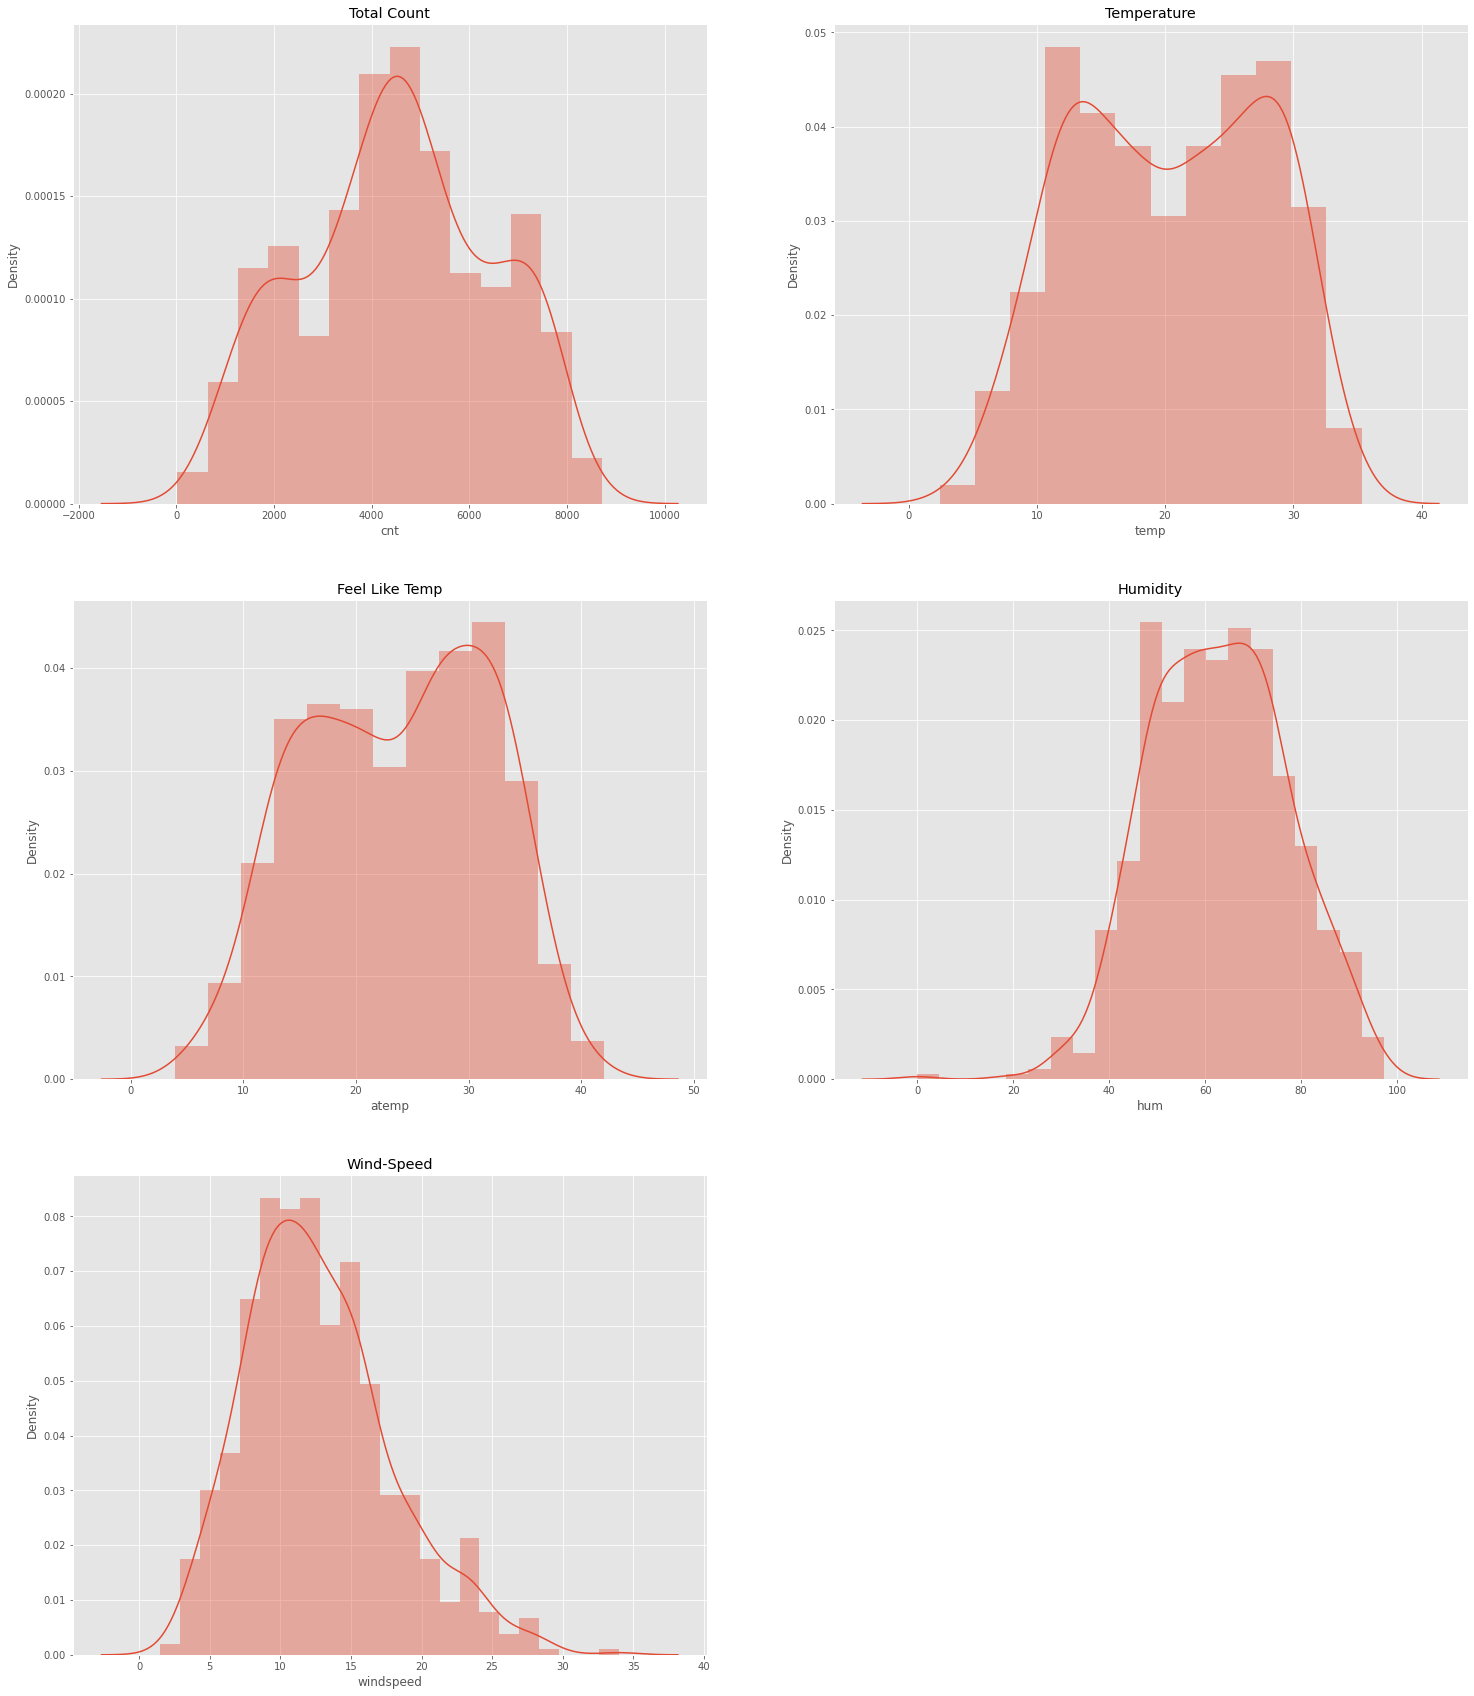

In [27]:
# Plotting distribution plot for all the continuous variables

plt.figure(figsize = (25,30))
plt.style.use('ggplot')

plt.subplot(3,2,1)
sns.distplot(bike_data['cnt'])
plt.title('Total Count')

plt.subplot(3,2,2)
sns.distplot(bike_data['temp'])
plt.title('Temperature')

plt.subplot(3,2,3)
sns.distplot(bike_data['atemp'])
plt.title('Feel Like Temp')

plt.subplot(3,2,4)
sns.distplot(bike_data['hum'])
plt.title('Humidity')

plt.subplot(3,2,5)
sns.distplot(bike_data['windspeed'])
plt.title('Wind-Speed')


plt.show()

#### Insights:
1. 'Cnt' variable has a bell curve between 3500 & 6500 and the peak value of bikes rented is between 4000-5000 bikes.
2. 'temp' variable has a dip in the bell curve between 15-25 degrees celcius due to seasonal temperature variations.
3. 'atemp' variable has a dip in the bell curve between  22-24 degrees celcius.
4. 'hum' varibale the bell curve is between 45 & 80. 
5. 'windspeed' variable ihas a bell curve between 7-17.

### Categorical Variables

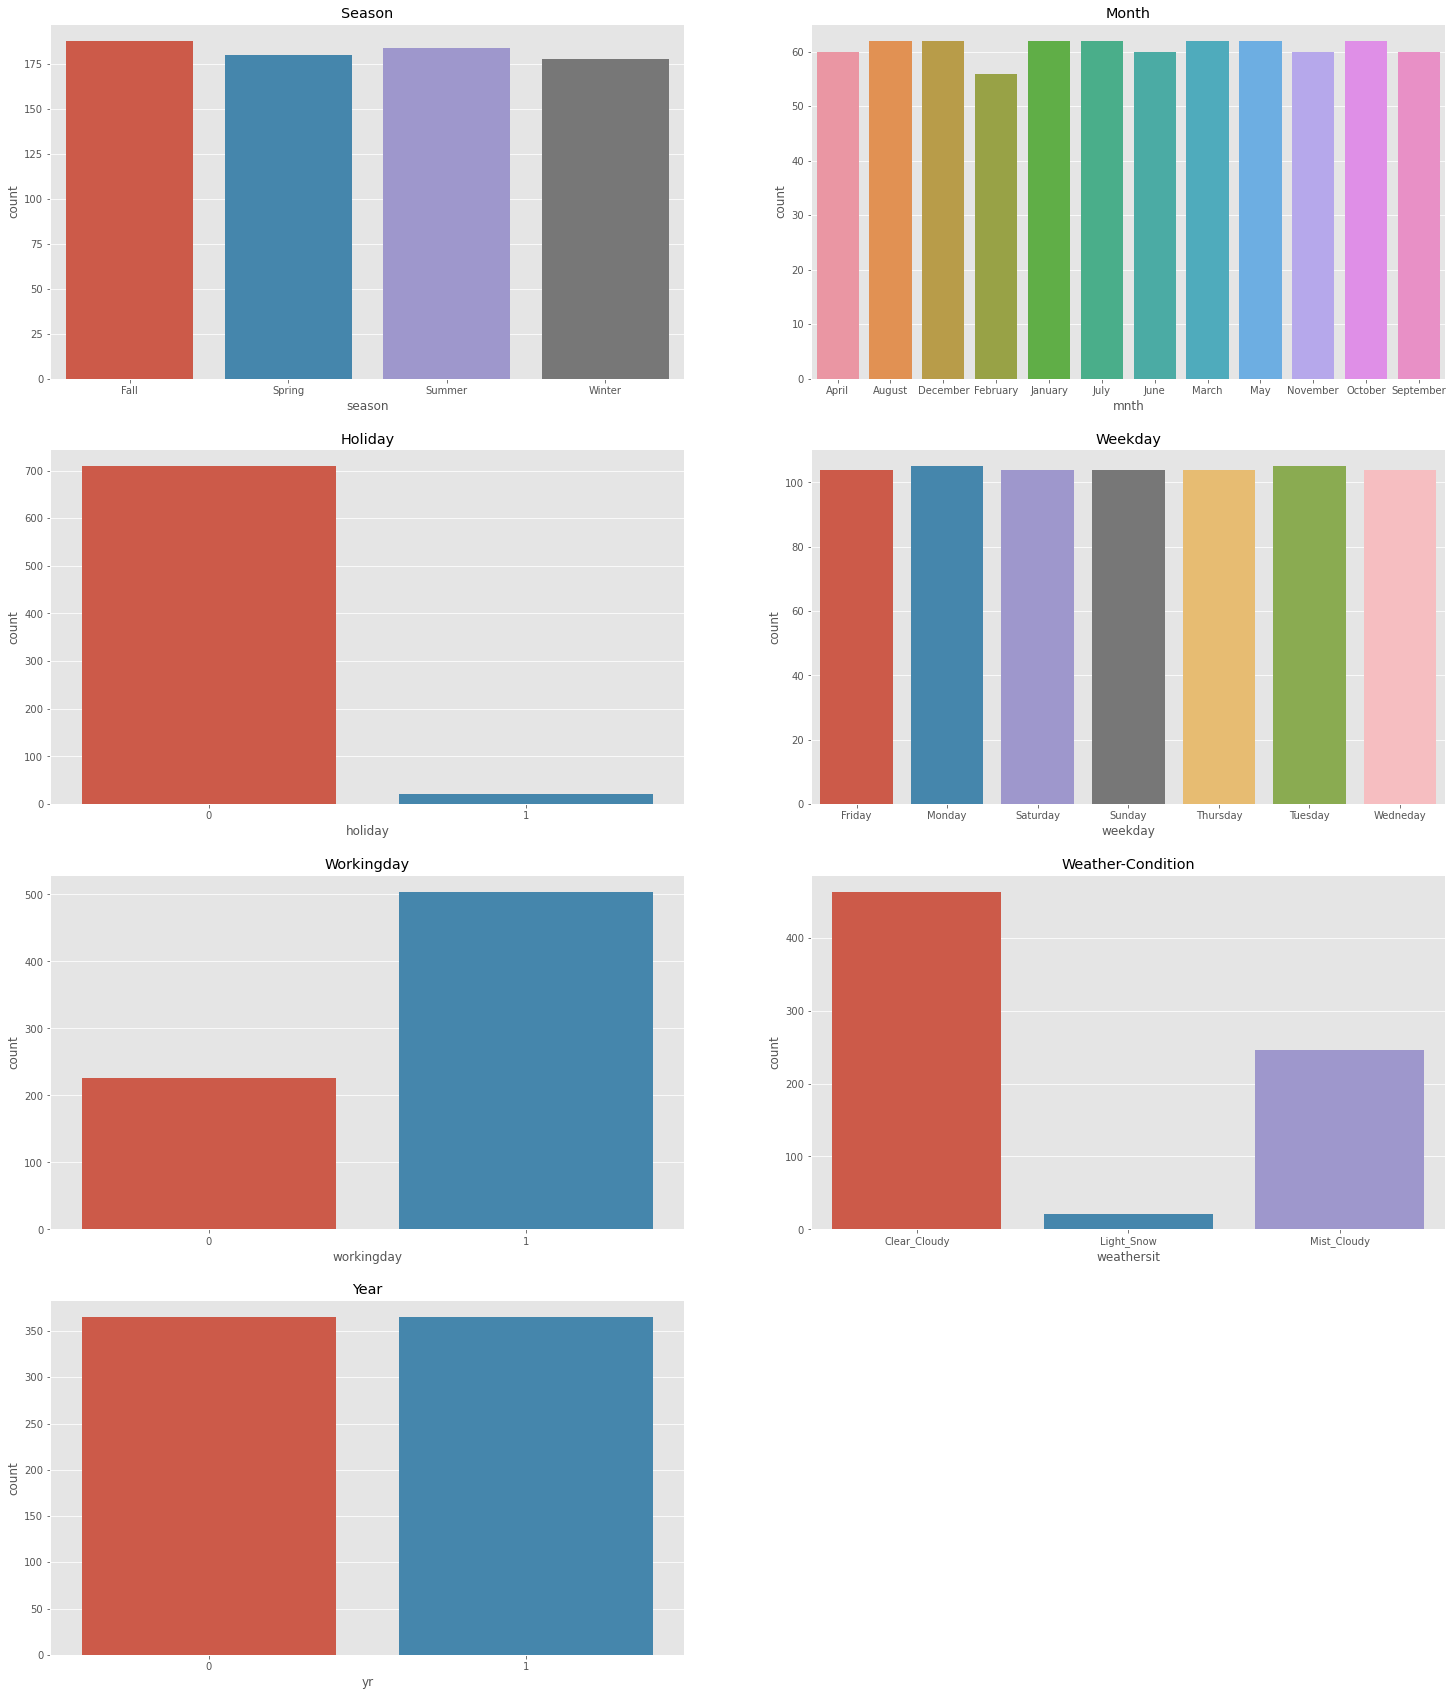

In [28]:
# Plotting count plot for all the categorical variables

plt.figure(figsize = (25,30))

plt.subplot(4,2,1)
sns.countplot(bike_data['season'])
plt.title('Season')

plt.subplot(4,2,2)
sns.countplot(bike_data['mnth'])
plt.title('Month')

plt.subplot(4,2,3)
sns.countplot(bike_data['holiday'])
plt.title('Holiday')

plt.subplot(4,2,4)
sns.countplot(bike_data['weekday'])
plt.title('Weekday')

plt.subplot(4,2,5)
sns.countplot(bike_data['workingday'])
plt.title('Workingday')

plt.subplot(4,2,6)
sns.countplot(bike_data['weathersit'])
plt.title('Weather-Condition')

plt.subplot(4,2,7)
sns.countplot(bike_data['yr'])
plt.title('Year')

plt.show()

#### Insights:
1. Most of the bikes were rented 'fall' & least in spring season.
2. Bikes are mostly rented in the months of  'January','March','May,'June','July','October & least in February,Septemebr & November.
3. Most Bikes are rented on Not-Holidays, least count of bikes rented on holidays.
4. Mostly bikes ae rented on 'workingday's & 'Clear_Cloudy' weather condition.

### Bivariate Analysis

### Numerical to Numerical

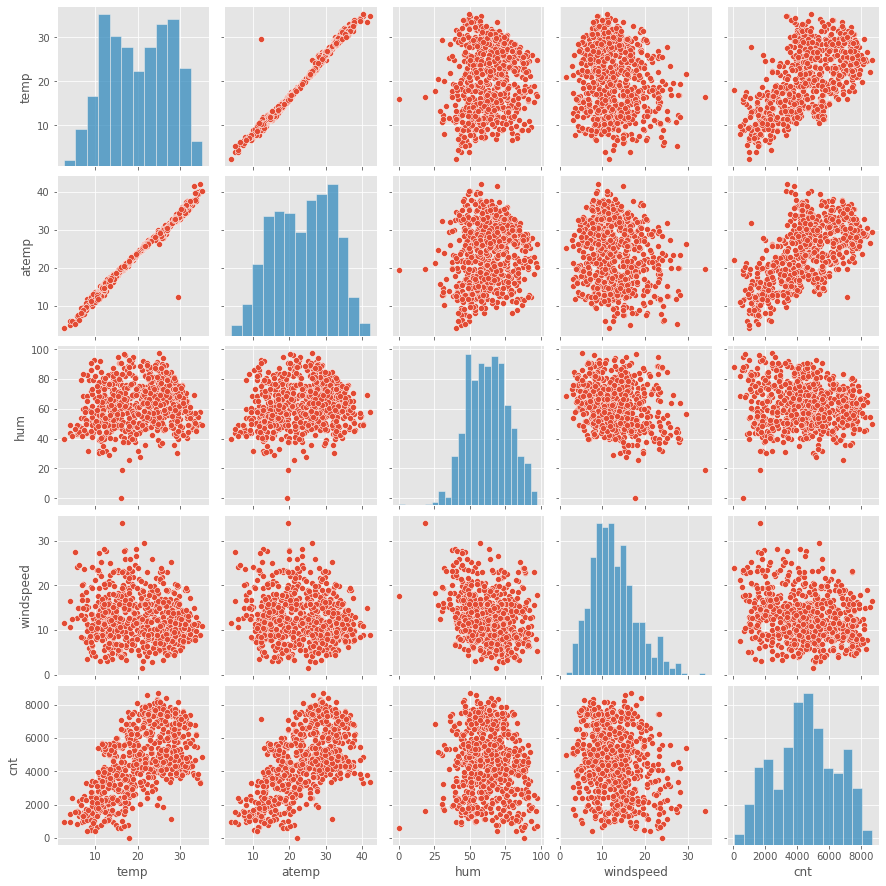

In [29]:
# Plotting pairplot for all numerical Columns with respect to target variable 'cnt'

sns.pairplot(bike_data[['temp', 'atemp','hum','windspeed','cnt']])
plt.show()

#### Insights :
1. 'temp' & 'cnt' variables have a positive linear relationship.
2. 'atemp' & 'atemp variables have a positive linear relationship.
3. 'hum' & 'windspeed' are scattered & do not have a realtionship with 'cnt' variable.

### temp vs cnt

<Figure size 1080x720 with 0 Axes>

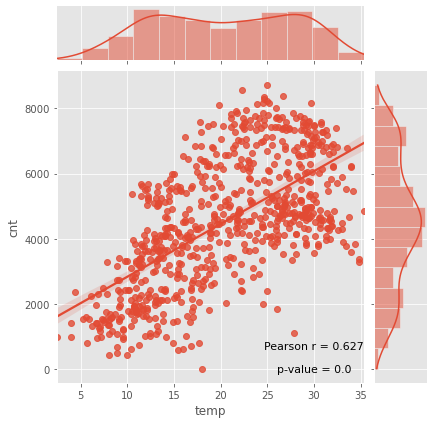

In [30]:
# Plotting linear regression Joint plot for Bike rental count distribution with respect to 'temp' variable

plt.figure(figsize=(15,10))

str1 = 'Pearson r = {}'.format(ss.pearsonr(bike_data['temp'],bike_data['cnt'])[0].round(3))
str2 = 'p-value = {}'.format(ss.pearsonr(bike_data['temp'],bike_data['cnt'])[1].round(9))

sns.jointplot(data = bike_data , x = 'temp' , y = 'cnt' , kind = 'reg' )

# Manually alogn the position of str & str2
plt.text(30 , 700 , str1 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )
plt.text(30 , 1.0  , str2 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )

plt.show()

#### Insights:
1. We can observe that the 'temp' & 'cnt data are positively & linearly related and also a linear regression line passing through the y-axis.
2. Pearsons r value for 'temp' & 'cnt' is  = 0.627 ,indicates a good positive linear relationship between them. So as the temp increases, the bikes rented also increases. 


#### atemp Vs cnt

<Figure size 720x720 with 0 Axes>

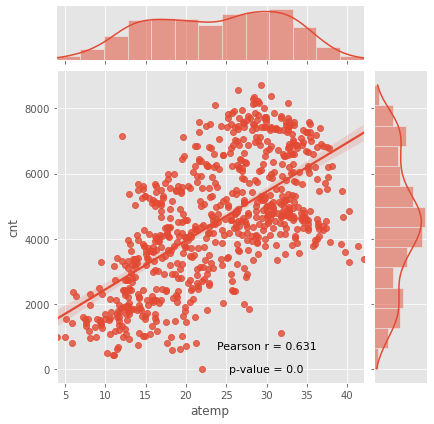

In [31]:
# Plotting linear regression Joint plot for Bike rental count distribution with respect to 'atemp' variable

plt.figure(figsize=(10,10))

str1 = 'Pearson r = {}'.format(ss.pearsonr(bike_data['atemp'],bike_data['cnt'])[0].round(3))
str2 = 'p-value = {}'.format(ss.pearsonr(bike_data['atemp'],bike_data['cnt'])[1].round(9))

sns.jointplot(data = bike_data , x = 'atemp' , y = 'cnt' , kind = 'reg' )

# Manually alogn the position of str & str2
plt.text(30 , 700 , str1 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )
plt.text(30 , 1.0  , str2 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )

plt.show()

#### Insights:
1. We can observe that the 'atemp' & 'cnt data are positively & linearly related and also a linear regression line passing through the y-axis.
2. Pearsons r value for 'atemp' & 'cnt' is  = 0.631 ,indicates a good positive linear relationship between them. So as the temp increases, the bikes rented also increases.

### hum Vs cnt

<Figure size 720x720 with 0 Axes>

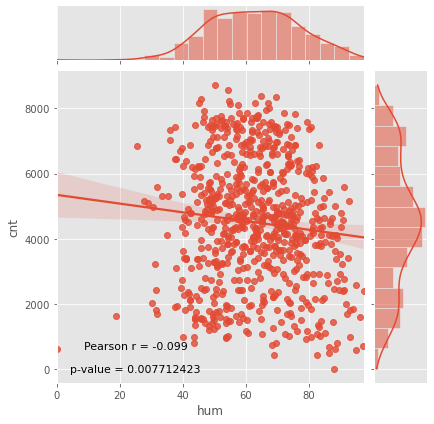

In [32]:
# Plotting linear regression Joint plot for Bike rental count distribution with respect to 'hum' variable

plt.figure(figsize=(10,10))
str1 = 'Pearson r = {}'.format(ss.pearsonr(bike_data['hum'],bike_data['cnt'])[0].round(3))
str2 = 'p-value = {}'.format(ss.pearsonr(bike_data['hum'],bike_data['cnt'])[1].round(9))

sns.jointplot(data = bike_data , x = 'hum' , y = 'cnt' , kind = 'reg' )

# Manually alogn the position of str & str2
plt.text(25 , 700 , str1 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )
plt.text(25 , 1.0  , str2 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )

plt.show()

#### Insights:
1. We can observe that the 'hum' & 'cnt data are negatively & linearly related ,also we can find a linear regression line passing through the y-axis.
2. Pearsons r value for 'hum' & 'cnt' is  = -0.099 ,indicates a negative relationship between them. So as the hum increases, the bikes rented decreases.

### windspeed vs cnt

<Figure size 576x360 with 0 Axes>

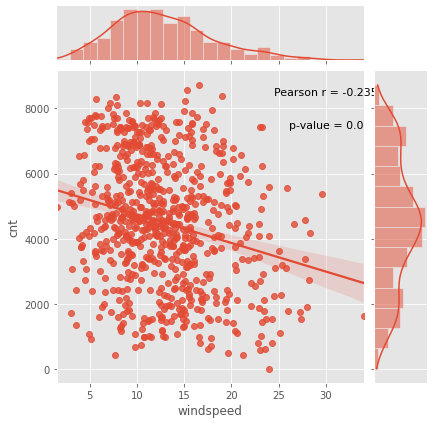

In [33]:
# Plotting linear regression Joint plot for Bike rental count distribution with respect to 'windspeed' variable

plt.figure(figsize=(8,5))

str1 = 'Pearson r = {}'.format(ss.pearsonr(bike_data['windspeed'],bike_data['cnt'])[0].round(3))
str2 = 'p-value = {}'.format(ss.pearsonr(bike_data['windspeed'],bike_data['cnt'])[1].round(9))

sns.jointplot(data = bike_data , x = 'windspeed' , y = 'cnt' , kind = 'reg' )

# Manually alogn the position of str & str2
plt.text(30 , 8500 , str1 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )
plt.text(30 , 7500  , str2 , horizontalalignment = 'center' , verticalalignment = 'center' , fontsize = 11 )

plt.show()

#### Insights:
1. We can observe that the 'windspeed' & 'cnt data are negatively & linearly related ,also we can find a linear regression line passing through the y-axis.
2. Pearsons r value for 'windspeed' & 'cnt' is  = -0.235 ,indicates a negative relationship between them. So as the 'windspeed' increases, the bikes rented decreases.

#### Count of bikes during weekdays in a month

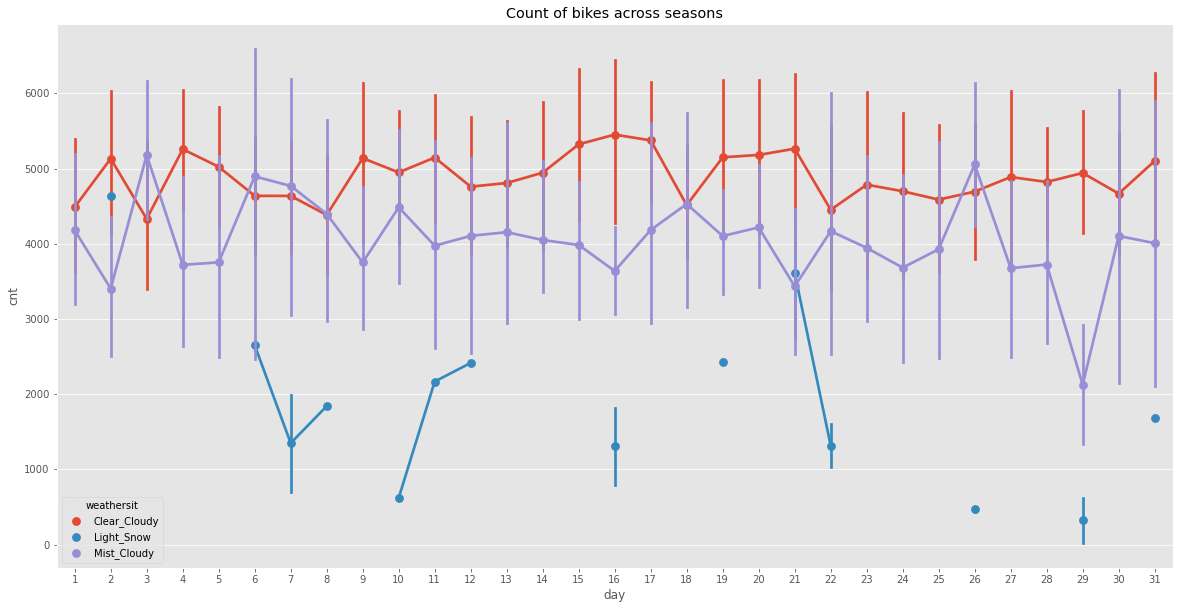

In [34]:
# pointplot for the biked rented with respect to the weather across the days in a month

plt.figure(figsize = (20,10))
sns.pointplot(data = bike_data , x = 'day' , y = 'cnt' , hue = 'weathersit')
plt.title("Count of bikes across seasons")
plt.show()

#### Insights:
Most of the bikes are rented on 'clear_cloudy' and  'Mist_cloudy' weather & rarely rented on 'Light_Snow' weather situation

#### Count of bikes rented on weekdays across seasons

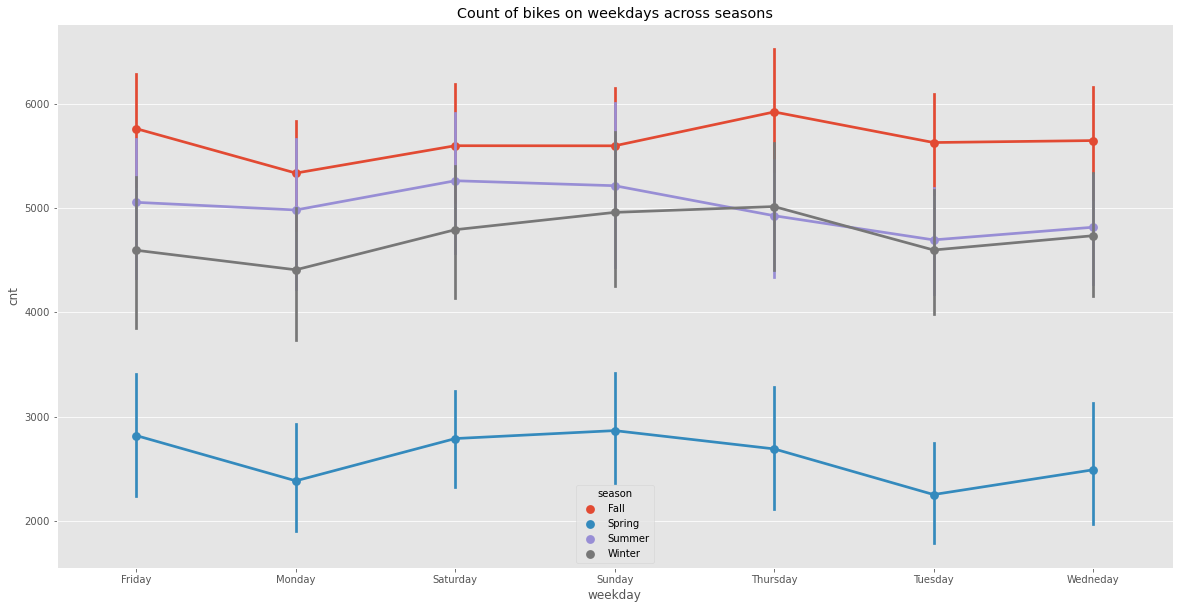

In [35]:
# pointplot for the biked rented with respect to the weather across the month

plt.figure(figsize = (20,10))
sns.pointplot(data = bike_data , x = 'weekday' , y = 'cnt' , hue = 'season')
plt.title("Count of bikes on weekdays across seasons")
plt.show()

#### Inferences
1. Most of the bikes rented are on Thursdays during 'Fall' & 'Summer'. 
2. Least no of bikes are rented on 'Monday & Tuesday and in 'Spring' season.

### Categorical to Categorical

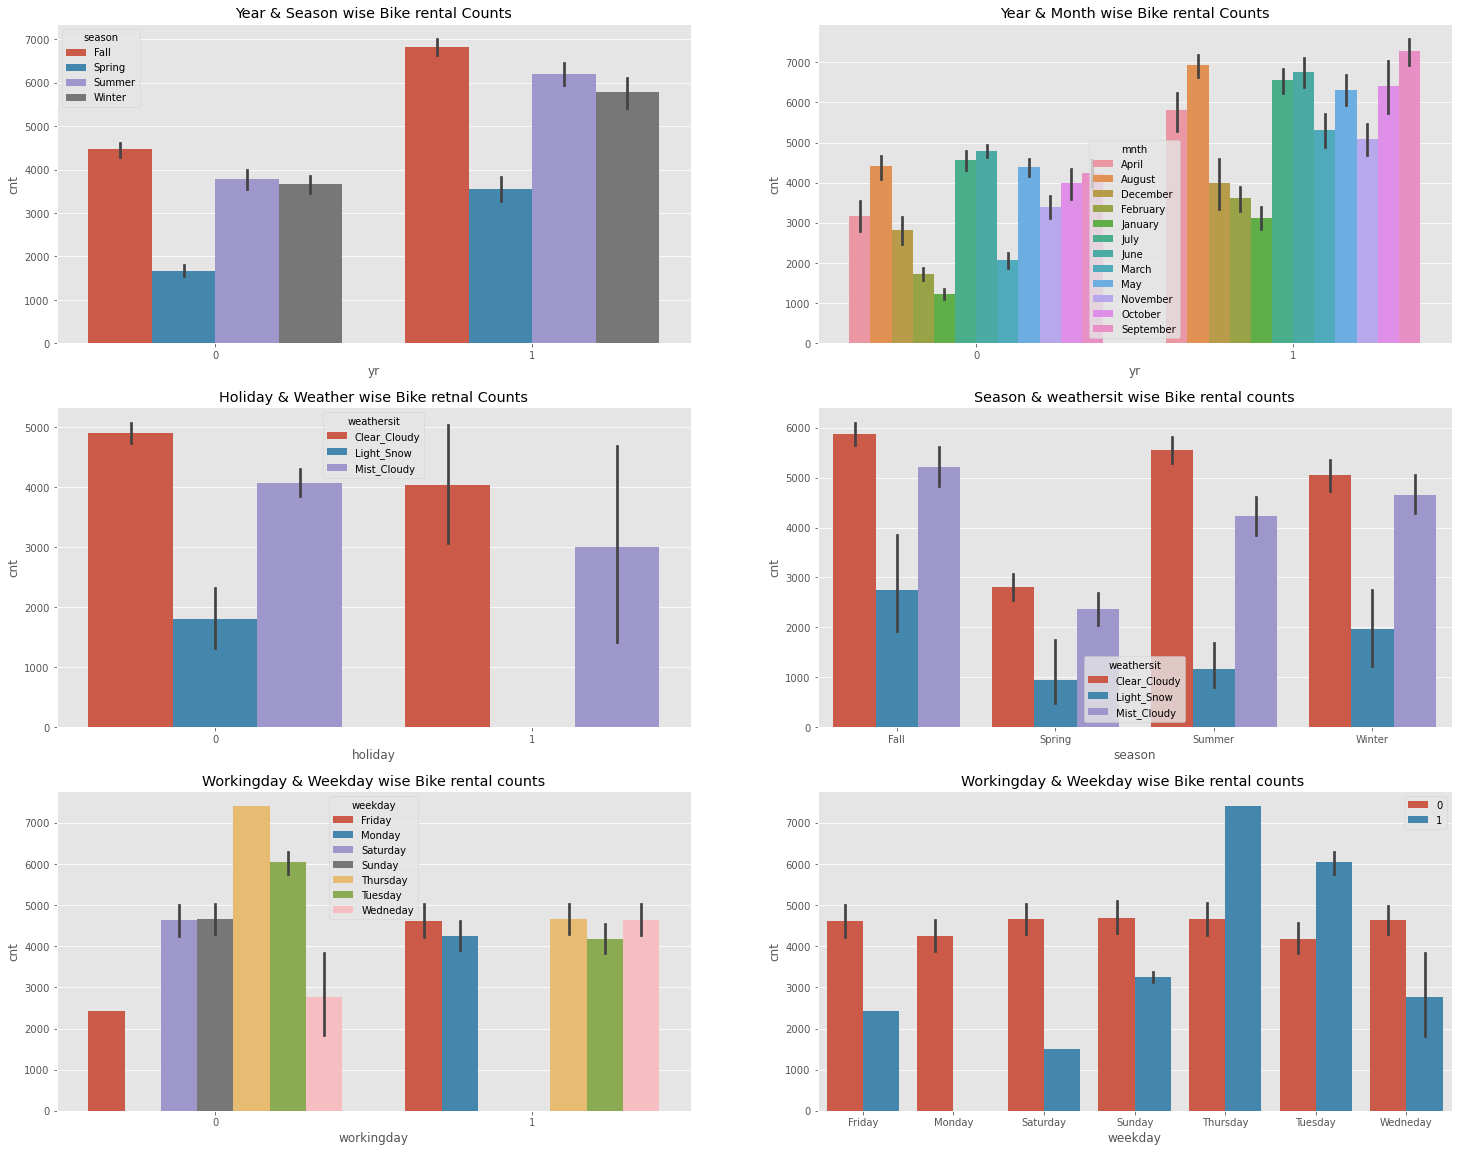

In [36]:
# Plotting barplots across various categorical vriables

plt.figure(figsize = (25,20))

plt.subplot(3,2,1)
sns.barplot(data = bike_data , x = 'yr', y = 'cnt' , hue = 'season' )
plt.title("Year & Season wise Bike rental Counts")

plt.subplot(3,2,2)
sns.barplot(data = bike_data , x = 'yr' , y = 'cnt' , hue = 'mnth')
plt.title("Year & Month wise Bike rental Counts")


plt.subplot(3,2,3)
sns.barplot(data = bike_data , x= 'holiday' ,y ='cnt' , hue = 'weathersit')
plt.title("Holiday & Weather wise Bike retnal Counts")

plt.subplot(3,2,4)
sns.barplot(data = bike_data , x = 'season' , y = 'cnt' , hue = 'weathersit')
plt.title("Season & weathersit wise Bike rental counts")

plt.subplot(3,2,5)
sns.barplot(data = bike_data , x = 'workingday' , y = 'cnt' , hue = 'weekday')
plt.title("Workingday & Weekday wise Bike rental counts")

plt.subplot(3,2,6)
sns.barplot(data = bike_data , x = 'weekday' , y = 'cnt' , hue = 'holiday')
plt.title("Workingday & Weekday wise Bike rental counts ")

plt.legend()
plt.show()

#### Inferences
1. Most bikes rented in year 2019 are highest during fall, followed by summer , winter seasons &  in June, July ,August & september months over 2018.
2. Also, most of the bikes rented on working day like Thursdays & tuesday on clear_cloudy weather condition.
3. During Fall, the demand for bikes is high on Clear_Cloudy & Mist Coudy weather

### Categorical to Numerical

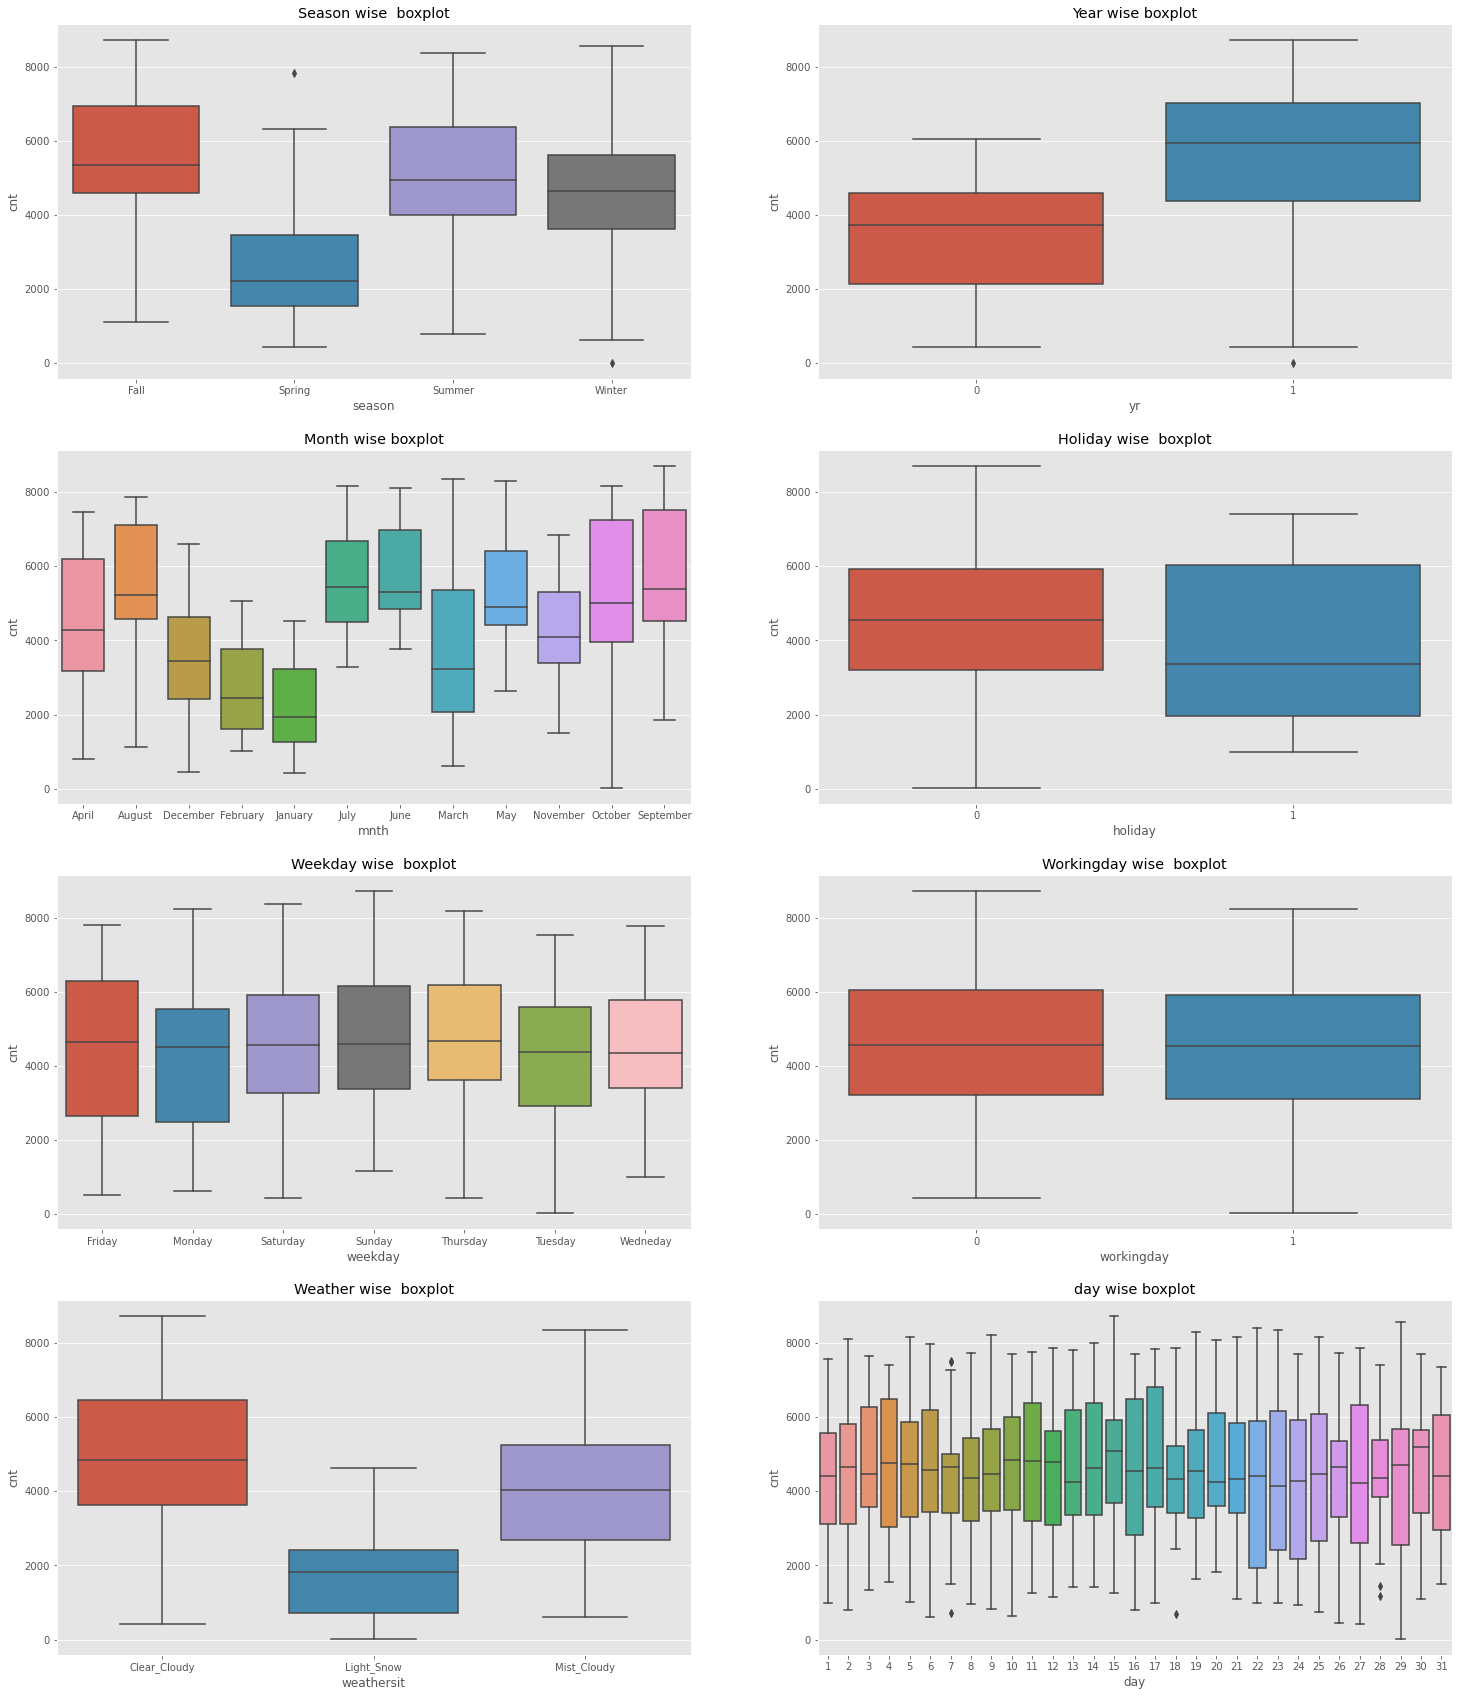

In [37]:
# Plotting boxplots across Categorical & numerical variables

plt.figure(figsize = (25,30))
plt.style.use('ggplot')

plt.subplot(4,2,1)
sns.boxplot( x = 'season' , y = 'cnt',data = bike_data  )
plt.title('Season wise  boxplot')

plt.subplot(4,2,2)
sns.boxplot( x = 'yr' , y = 'cnt',data = bike_data  )
plt.title('Year wise boxplot')

plt.subplot(4,2,3)
sns.boxplot( x = 'mnth' , y = 'cnt',data = bike_data  )
plt.title('Month wise boxplot')

plt.subplot(4,2,4)
sns.boxplot( x = 'holiday' , y = 'cnt',data = bike_data  )
plt.title('Holiday wise  boxplot')

plt.subplot(4,2,5)
sns.boxplot( x = 'weekday' , y = 'cnt',data = bike_data  )
plt.title('Weekday wise  boxplot')

plt.subplot(4,2,6)
sns.boxplot( x = 'workingday' , y = 'cnt',data = bike_data  )
plt.title('Workingday wise  boxplot')

plt.subplot(4,2,7)
sns.boxplot( x = 'weathersit' , y = 'cnt',data = bike_data  )
plt.title('Weather wise  boxplot')

plt.subplot(4,2,8)
sns.boxplot( x = 'day' , y = 'cnt',data = bike_data  )
plt.title('day wise boxplot')

plt.show()

#### Inference
1. Bikes are mostly rented in fall,summer & winter and least in spring season.
2. There is high demand for Bikes in 2019 are as high as 4500-7000 & least in 2018.
3. Bikes are higly rented during September,May,March ,June, July ,August, & October months.
4. High demand for Bikes are no Holidays over Holiday.
5. Demand is high on Sunday,Saturday, Friday Thursday & Monday.
6. Avg Bikes rented on workingdays is between 4500-5000
7. Huge deamnd for bikes on 'Clear_Cloudy'then 'Mist_Cloudy and least on 'Light_snow'.
8. Its observed that most of the bikes are rented on 6,15,22 & 29 , probably they are fridays.

### Correlation Matrix:

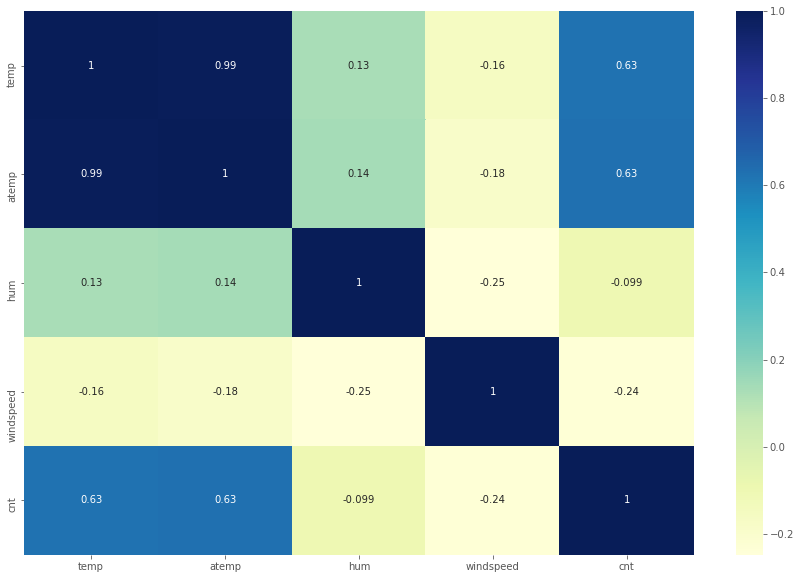

In [38]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_data.corr() , cmap = 'YlGnBu' , annot = True )
plt.show()

#### Insights: 
1. 'atemp' & 'temp variable are highly correlated to each other & show Multi-Collinearlity, drop atemp as it is explained by the temp variable.
2. 'hum' variable has a value close to 0,it means there is no correaltion between 'hum' & 'cnt' target variable.
3. 'temp' variable has high correlation with the 'cnt' variable.

In [39]:
# Creating a combined variable 'relative_temp' as difference of temp & atemp as it might help to know atemp if required
bike_data['relative_temp'] = bike_data.apply(lambda x : abs(x['atemp'] - x['temp']) ,axis = 1)

# Drop 'atemp' variable as it is the explained by temp & realative vaariables to avoid redundancy
bike_data = bike_data.drop(['atemp'] , axis = 1)

In [40]:
# Check the head of the bike_data after creating 'relative_temp' variable & dropping 'atemp' variable
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,relative_temp
instant,,,,,,,,,,,,,
1,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,4.070403
2,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,2,2.784352
3,Spring,0,January,0,Wedneday,1,Clear_Cloudy,8.050924,43.7273,16.636703,1349,3,1.419326
4,Spring,0,January,0,Thursday,1,Clear_Cloudy,8.200000,59.0435,10.739832,1562,4,2.406100
5,Spring,0,January,0,Friday,1,Clear_Cloudy,9.305237,43.6957,12.522300,1600,5,2.158263


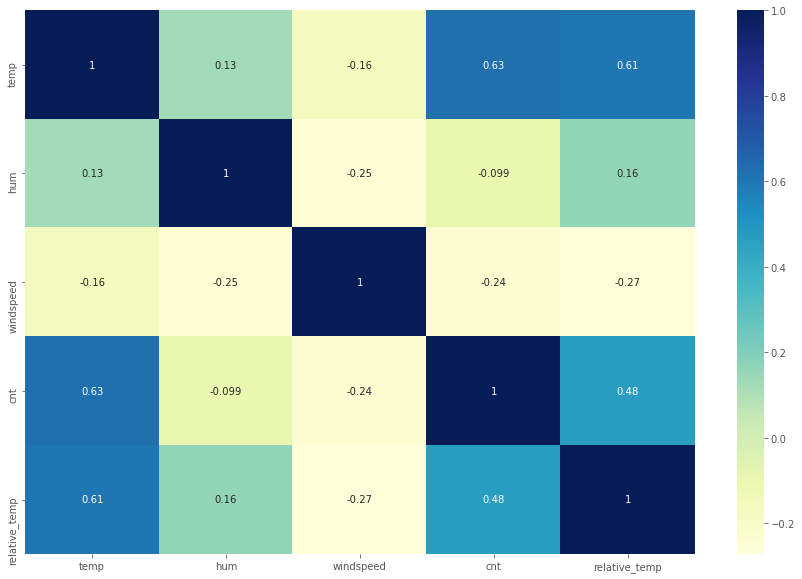

In [41]:
# Check the correlation matrix 

plt.figure(figsize = (15,10))
sns.heatmap(bike_data.corr() , cmap = 'YlGnBu' , annot = True )
plt.show()

#### Inferences:
1. 'temp' & 'cnt' show good correlation.
2. 'temp & 'relative_temp' also show good correlation but in acceptable range.
3. There is no multicollinearity between independant variables.

## Step 4 : Data Preparation
1. Convert binary variables to 1/0.
2. Encode Categorical variables into Dummy variables
3. Divide/Split  the Data into train & test 
4. Rescaling the features
5. Divide data inot X & y variables.

### Step 4.1  Convert Binary variables to 1/0 :

In [42]:
# Check if the any binary variables have 'yes/no' and convert to 1/0
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,relative_temp
instant,,,,,,,,,,,,,
1,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,4.070403
2,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,2,2.784352
3,Spring,0,January,0,Wedneday,1,Clear_Cloudy,8.050924,43.7273,16.636703,1349,3,1.419326
4,Spring,0,January,0,Thursday,1,Clear_Cloudy,8.200000,59.0435,10.739832,1562,4,2.406100
5,Spring,0,January,0,Friday,1,Clear_Cloudy,9.305237,43.6957,12.522300,1600,5,2.158263


#### Inferences:
1. All variables have 0/1 & we need not have to convert any variable.

### 4.2  Encode Categorical variables into Dummpy variables

1. The variable 'season' has 4 levels, we need to convert them into (4-1 = 3) integer dummy variables.
2. The variable 'mnnth' has 12 levels, we need to convert them into (12-1 = 11) integer dummy varibales.
3. The variable 'weekday' has 7 levels, we need to convert them into (7-1 = 6) integer dummy variables
4. The variable 'weathersit' has 3 levels, we need to convert them into (3-1 =2) integer dummy variables.

In [43]:
# Check the dtypes of all variables & create dummy variables for categories with more than 3 labels
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         730 non-null    category
 1   yr             730 non-null    category
 2   mnth           730 non-null    category
 3   holiday        730 non-null    category
 4   weekday        730 non-null    category
 5   workingday     730 non-null    category
 6   weathersit     730 non-null    category
 7   temp           730 non-null    float64 
 8   hum            730 non-null    float64 
 9   windspeed      730 non-null    float64 
 10  cnt            730 non-null    int64   
 11  day            730 non-null    category
 12  relative_temp  730 non-null    float64 
dtypes: category(8), float64(4), int64(1)
memory usage: 62.8 KB


In [44]:
# Making a list of 'object' or 'category' columns to create dummy variables
categorical_cols = ['mnth', 'season', 'weekday' , 'weathersit']

# Get the dummy variables for the categorical cols & store in dummies_df using get_dummies method
# Here we drop the first dummy column as the combination of 1's & 0's explain the first_dummy column

dummies_df = pd.get_dummies(bike_data[categorical_cols] , drop_first = True )

# Concat the summies_df & bike_data 
bike_data = pd.concat([bike_data,dummies_df] , axis = 1)

# Drop the lis tof categorical columns for which the dummies are created
bike_data.drop(['season', 'mnth' , 'weekday' , 'weathersit'] , axis=1 , inplace = True)

# Check the data set with the new dummy columns
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,relative_temp,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wedneday,weathersit_Light_Snow,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,80.5833,10.749882,985,1,4.070403,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,14.902598,69.6087,16.652113,801,2,2.784352,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.050924,43.7273,16.636703,1349,3,1.419326,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,1562,4,2.406100,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,1600,5,2.158263,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Step 4.3  Divide/Split  the Data into train & test data sets

In [45]:
# First basic step for BuildingLinear Regression Model is to split the bike_data into df_train & df_test dataframes 
# Here we split into 70 : 30 ratio of the bike_data  

df_train, df_test = train_test_split(bike_data , train_size = 0.7, test_size = 0.3 , random_state = 100)

In [46]:
# Check the shape of the train set
df_train.shape

(510, 31)

In [47]:
# Check the shape of the test set
df_test.shape

(219, 31)

### Step 4.4  Rescaling the features

1. Rescaling the features to make them on a comparable scale.
2. Else, some of the coefficinets obtained in the fitted regression model might be very small or very large and not appreciable during Model Evaluation
3. Here, Rescaling the features using MinMax method

In [48]:
# Create a Scaler Object
scaler = MinMaxScaler()

In [49]:
# Create a list of continuous vaariables & apply scaler to only continuous variables & not the category/object/dummy varaibles
continuous_variables = ['temp' ,'relative_temp', 'hum' , 'windspeed' ,'cnt']

df_train[continuous_variables] = scaler.fit_transform(df_train[continuous_variables])

In [50]:
# Check the df_train dataframe data
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,relative_temp,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wedneday,weathersit_Light_Snow,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.575354,0.300794,0.864243,16,0.212853,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
577,1,0,1,0.815169,0.725633,0.264686,0.827658,31,0.216158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.640189,0.255342,0.465255,3,0.204411,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
729,1,0,1,0.245101,0.498067,0.663106,0.204096,30,0.055102,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.504508,0.188475,0.482973,28,0.189359,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [51]:
# Cross Check rescaling of features to have min = 0 & Max = 1 values using the statistical sumary of the train set
df_train.describe()

,temp,hum,windspeed,cnt,relative_temp,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wedneday,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.191023,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.243137,0.245098,0.24902,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.063379,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.429398,0.430568,0.43287,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.165286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.204346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.219252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


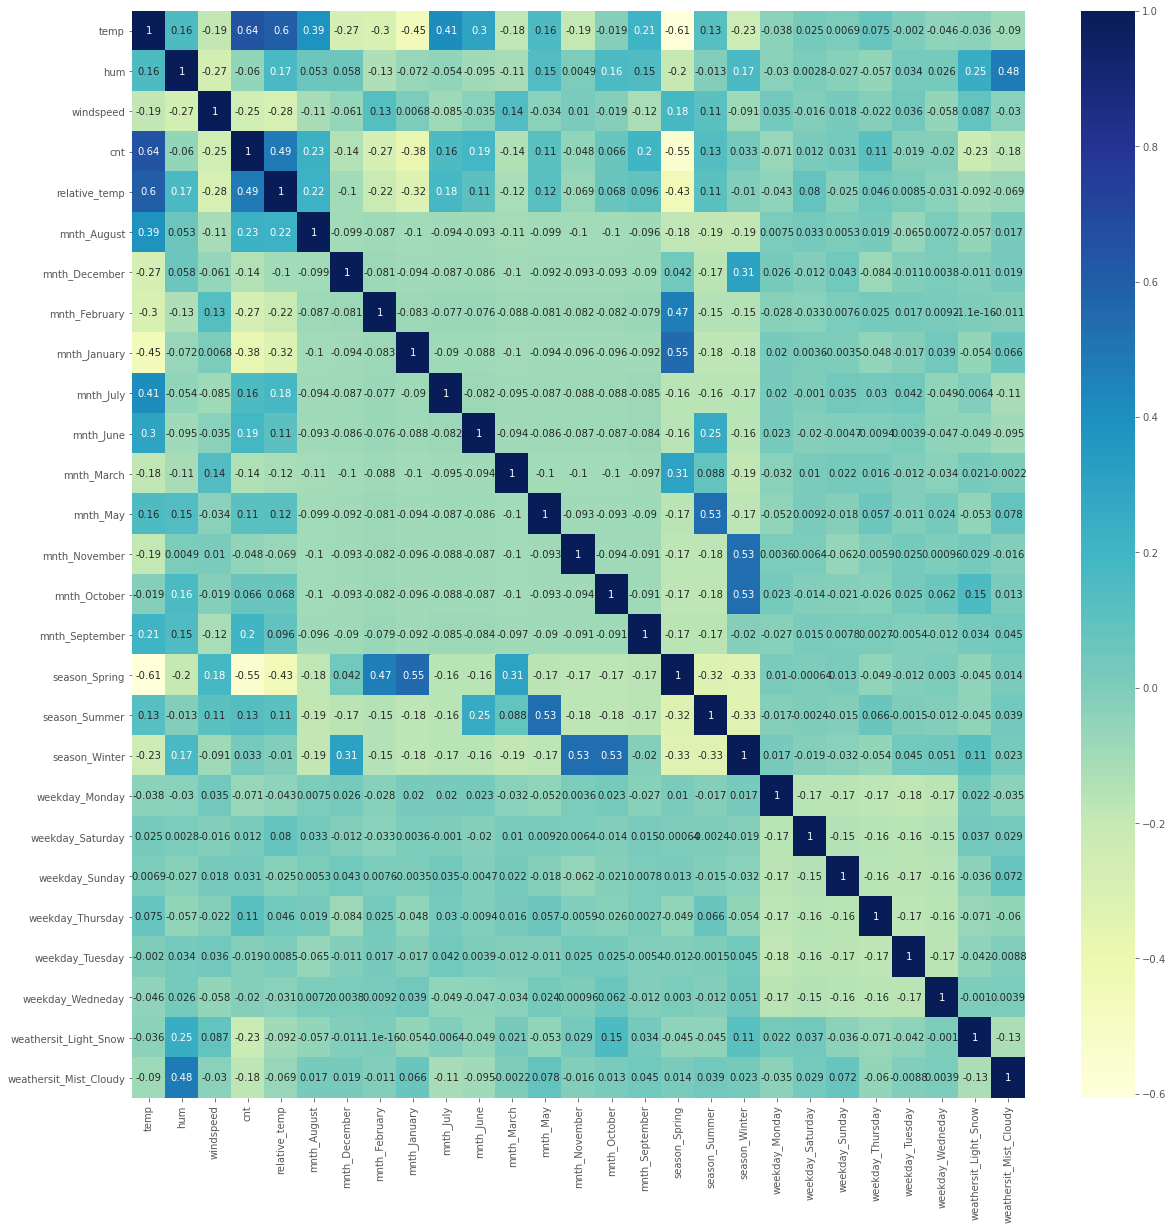

In [52]:
# Check the top correlated variables by plotting heatmap

plt.figure(figsize = [20,20])
sns.heatmap(df_train.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

#### Insights:
1. independant variables 'temp' ,'relative_temp','season_spring' have correlation with target variable 'cnt'.

### Step 4.5 Diving into X & y sets for Model Building

In [53]:
# Set target variable y_train = 'cnt' and X_train = all features except 'cnt' from train_df
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5 : Model Building using RFE 

### Step 5.1: RFE  - Recursive Feature Elimination 

1. Building Linear Model with Mixed Approach : RFE - Recursive Feature Elimination
2. Here we use the LinearRegression Model from scikit Learn for its compatibility  with RFE.

In [54]:
# Instantiate an LinearRegression Object
lm = LinearRegression()

# Fitting the linear regression object with X_train & y_train
lm.fit(X_train , y_train)

# Running RFE with 20 Output Features
rfe = RFE(lm , 20)
rfe = rfe.fit(X_train, y_train)

In [55]:
# Printing the top selected features / significant features 

list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 11),
 ('relative_temp', True, 1),
 ('mnth_August', False, 5),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_March', False, 10),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 7),
 ('mnth_September', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wedneday', False, 6),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [56]:
# Creating a list of Top selected Variables for Model building with these features 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'relative_temp', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_May', 'mnth_November', 'mnth_September',
       'season_Spring', 'season_Winter', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [57]:
# Varaibles not suitable for Model building
X_train.columns[~rfe.support_]

Index(['day', 'mnth_August', 'mnth_June', 'mnth_March', 'mnth_October',
       'season_Summer', 'weekday_Monday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wedneday'],
      dtype='object')

### Step 5.2 : Building Model using statsmodel

### Step 5.2.1 : Building the Model

In [58]:
# Creating X_train dataframe with RFE selected features
X_train_rfe = X_train[col]

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.60e-185
Time:                        19:01:51   Log-Likelihood:                 519.21
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     489   BIC:                            -907.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4168      0.079      5.286      0.000       0.262       0.572
yr                         0.2312      0.008     28.613      0.000       0.215       0.247
holiday                   -0.1334      0.065     -2.038      0.042      -0.262      -0.005
workingday                -0.0586      0.071     -0.829      0.407      -0.198       0.080
temp                       0.4053      0.036     11.219      0.000       0.334       0.476
hum                       -0.1601      0.038     -4.191      0.000      -0.235      -0.085
windspeed                 -0.1766      0.026     -6.808      0.000      -0.228      -0.126
relative_temp              0.0989      0.083      1.195      0.233      -0.064       0.262
mnth_December             -0.0556      0.018     -3.110      0.002      -0.091      -0.020
mnth_February             -0.0416      0.021     -1.941      0.053      -0.084       0.001
mnth_January              -0.0704      0.021     -3.339      0.001      -0.112      -0.029
mnth_July                 -0.0611      0.017     -3.500      0.001      -0.095      -0.027
mnth_May                   0.0366      0.016      2.330      0.020       0.006       0.068
mnth_November             -0.0507      0.019     -2.715      0.007      -0.087      -0.014
mnth_September             0.0642      0.016      4.081      0.000       0.033       0.095
season_Spring             -0.0785      0.017     -4.483      0.000      -0.113      -0.044
season_Winter              0.0814      0.014      5.614      0.000       0.053       0.110
weekday_Saturday          -0.0437      0.071     -0.619      0.536      -0.182       0.095
weekday_Sunday            -0.0363      0.070     -0.515      0.606      -0.175       0.102
weathersit_Light_Snow     -0.2480      0.027     -9.337      0.000      -0.300      -0.196
weathersit_Mist_Cloudy    -0.0583      0.011     -5.535      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       83.876   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.259
Skew:                          -0.807   Prob(JB):                     4.48e-50
Kurtosis:                       5.844   Cond. No.                         67.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Creating a function to Check VIF :

In [59]:
# Calculate the VIF values for the feature variables:

def calc_vif(X):
    
    # Create a dataframe 'vif' that will contain all the features & their respective VIF values
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' ,ascending = False)
    return vif

# Check VIF for the features in the model
calc_vif(X_train_rfe)

,Features,VIF
2,workingday,39.83
4,hum,38.62
3,temp,27.51
6,relative_temp,17.55
17,weekday_Sunday,8.14
16,weekday_Saturday,7.93
5,windspeed,5.45
14,season_Spring,4.66
15,season_Winter,3.33
9,mnth_January,2.48


#### Observations:
1. Newly built Model lm  R-squared:	0.848
2. Newly built Model lm  Adj. R-squared:	0.842
3. Features with p-value > 0.05 &  VIF > 10 :
        
    1. workingday	    : 0.407 , 39.83 -> p-value>0.05 & VIF>10
    2. relative_temp    : 0.233 , 17.55
    3. weekday_Saturday : 0.536 , 7.93   
    4. weekday_Sunday   : 0.606 , 8.14   

4. Hence we can drop 'workingday' as both the p-value & VIF are high and rebuild a new model

### Step 5.2.2 : Rebuilding the Model after dropping insignificant variable

In [60]:
# Drop the insignificant feature from the X_train_rfe & re-buid a new linear fitted model
X_train_rfe = X_train_rfe.drop(['workingday'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_1 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_1.summary())

# Check VIF for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.85e-186
Time:                        19:01:51   Log-Likelihood:                 518.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     490   BIC:                            -913.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
3,hum,28.57
2,temp,24.05
5,relative_temp,16.72
13,season_Spring,4.33
4,windspeed,4.10
14,season_Winter,3.23
8,mnth_January,2.37
18,weathersit_Mist_Cloudy,2.34
0,yr,2.09
7,mnth_February,1.92


#### Observations:
1. Model lm_1 - R-squared:	0.848
2. Model lm_1 - Adj. R-squared:	0.842
3. Features p-value > 0.05 & VIF > 10 value are:
        
    1. relative_temp  : 0.230 , 16.72  -> p-value > 0.05 & VIF > 10
    2. mnth_February : 0.055 , 1.92   
    3. weekday_Saturday: 0.248 , 1.20 
    4. weekday_Sunday   : 0.071 , 1.20   

4. Hence we can drop 'relative_temp' as both the p-value & VIF are high and is insignificant feature

####  Rebuilding the Model after dropping insignificant variable

In [61]:
# Drop the insinificant feature from the X_train_rfe & rebuild a a new linear fitted model
X_train_rfe = X_train_rfe.drop(['relative_temp'], axis = 1 )

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_2 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_2.summary())

# Check VIF for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.03e-187
Time:                        19:01:51   Log-Likelihood:                 518.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     491   BIC:                            -917.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
3,hum,26.40
2,temp,17.58
12,season_Spring,4.30
4,windspeed,4.09
13,season_Winter,3.17
7,mnth_January,2.37
17,weathersit_Mist_Cloudy,2.29
0,yr,2.07
6,mnth_February,1.92
10,mnth_November,1.85


#### Observations:
1. Model lm_2 - R-squared:	0.848
2. Model lm_2 - Adj. R-squared:	0.842
3. Features with p-value > 0.05 &  VIF > 10 are :

    1. mnth_February    : 0.053 , 1.92   
    2. weekday_Saturday : 0.204 , 1.18 -> p-value > 0.05 & VIF < 10
    3. weekday_Sunday   : 0.072 , 1.20   
    
4. Hence we can drop 'weekday_Saturday' as the p-value > 0.05 & VIF < 10 , which is insignificant feature

#### Rebuilding the Model after dropping insignificant variable

In [62]:
# Drop the insignificant feature from the X_train_rfe & rebuild a new linear fitted model
X_train_rfe = X_train_rfe.drop(['weekday_Saturday'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_3 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_3.summary())

# Check VIF
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.26e-188
Time:                        19:01:51   Log-Likelihood:                 517.26
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
3,hum,26.39
2,temp,17.42
12,season_Spring,4.28
4,windspeed,4.09
13,season_Winter,3.17
7,mnth_January,2.37
16,weathersit_Mist_Cloudy,2.28
0,yr,2.07
6,mnth_February,1.92
10,mnth_November,1.84


#### Observations:
1. Model lm_3 - R-squared:	0.847
2. Model lm_3 - Adj. R-squared:	0.842
3. Features with p-value > 0.05 &  VIF > 10 value :

    1. weekday_Sunday   : 0.106 , 1.17   -> p-value > 0.05 & VIF < 10

4. Hence we can drop 'weekday_Sunday' as the p-value >0.05 & VIF < 10 which is insignificant feature


#### Rebuilding the Model after dropping after dropping insignificant variable

In [63]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['weekday_Sunday'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_4 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_4.summary())

# Check VIF
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.45e-188
Time:                        19:01:51   Log-Likelihood:                 515.91
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
3,hum,26.38
2,temp,17.35
12,season_Spring,4.28
4,windspeed,4.08
13,season_Winter,3.17
7,mnth_January,2.37
15,weathersit_Mist_Cloudy,2.27
0,yr,2.07
6,mnth_February,1.92
10,mnth_November,1.84


#### Observations:
1. Model lm_4 - R-squared:	0.846
2. Model lm_4 - Adj. R-squared:	0.841
3. All features appear to have p-value below 0.05
3. Below are the features with high VIF means High multi-collinearity

    1. hum	 - 26.38( VIF)
    2. temp	 - 17.35 (VIF)

4. 'temp' & 'hum' features have multicollinearity. One of them is enough to explain about the other variable.
5.  We can handle highly correlated variables & build a new model

###  Step 5.2.3 : Handling  Multicollinearity

1. Dropping one of the feature will help in reducing the multicollinearity between correlated variables.
2. Combining the highly correlated variables & dropping the actual variables will reduce multicollinearity

In [64]:
# Fixing Multicollinearity

X_train_rfe['relative_temp_hum'] = X_train_rfe.apply(lambda x : abs(x['temp'] - x['hum']) ,axis = 1)
X_train_rfe = X_train_rfe.drop(['hum'] , axis = 1)

# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
#X_train_rfe = X_train_rfe.drop(['hum'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_5 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_5.summary())

# Check the VIFs for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.07e-190
Time:                        19:01:51   Log-Likelihood:                 521.02
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.87
15,relative_temp_hum,4.96
3,windspeed,4.06
11,season_Spring,3.96
12,season_Winter,2.71
6,mnth_January,2.54
0,yr,2.08
5,mnth_February,1.95
9,mnth_November,1.87
4,mnth_December,1.73


#### Observations:
1. Model lm_5 - R-squared:	0.849
2. Model lm_5 - Adj. R-squared:	0.844
3. All features appear to have VIF < 10
3. Below are the features with high p-value > 0.05  :

mnth_February : 0.165
mnth_July     : 0.053
mnth_May      : 0.389

4. Drop the variable with high p-value 'mnth_May' which is insignificant feature

In [65]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['mnth_May'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_6 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_6.summary())

# Check VIF's for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.12e-191
Time:                        19:01:51   Log-Likelihood:                 520.63
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.41
14,relative_temp_hum,4.94
3,windspeed,4.06
10,season_Spring,3.91
11,season_Winter,2.64
6,mnth_January,2.53
0,yr,2.08
5,mnth_February,1.95
8,mnth_November,1.87
4,mnth_December,1.72


####  Observations:
1. Model lm_6 - R-squared:	0.849
2. Model lm_6 - Adj. R-squared:	0.844
3. All features appear to have VIF < 10
3. Below feature has high p-value > 0.05:

mnth_February : 0.167

4. Drop the variable with high p-value 'mnth_February' is insignificant feature

In [66]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['mnth_February'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_7 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_7.summary())

# Check VIF's for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.02e-192
Time:                        19:01:51   Log-Likelihood:                 519.64
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.28
13,relative_temp_hum,4.75
3,windspeed,4.05
9,season_Spring,2.74
10,season_Winter,2.62
0,yr,2.07
7,mnth_November,1.84
5,mnth_January,1.82
12,weathersit_Mist_Cloudy,1.70
4,mnth_December,1.58


#### Observations:
1. Model lm_7 - R-squared:	0.848
2. Model lm_7 - Adj. R-squared:	0.844
3. All features appear to have VIF < 10
3. Below feature have high p-value > 0.05:

mnth_December : 0.062
mnth_January  : 0.063

4. Drop the variable 'mnth_January' as it is insignificant feature & rebuild a new model

In [67]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['mnth_January'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_8 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_8.summary())

# Check the VIFs for the model
calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.58e-193
Time:                        19:01:51   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -948.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.12
12,relative_temp_hum,4.29
3,windspeed,4.04
9,season_Winter,2.62
8,season_Spring,2.39
0,yr,2.06
6,mnth_November,1.82
11,weathersit_Mist_Cloudy,1.70
4,mnth_December,1.49
5,mnth_July,1.40


#### Observations:
1. Model lm_8 - R-squared:	0.847
2. Model lm_8 - Adj. R-squared:	0.843
3. All features appear to have VIF < 10
3. Below feature has high p-value > 0.05:

    mnth_December : 0.152


4. Drop the variable with high p-value 'mnth_December' variable

In [68]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['mnth_December'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_9 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_9.summary())


calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-193
Time:                        19:01:51   Log-Likelihood:                 516.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     497   BIC:                            -952.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.06
11,relative_temp_hum,4.08
3,windspeed,4.04
7,season_Spring,2.39
8,season_Winter,2.16
0,yr,2.06
10,weathersit_Mist_Cloudy,1.70
5,mnth_November,1.59
4,mnth_July,1.40
6,mnth_September,1.24


#### Observations:
1. Model lm_9 - R-squared:	0.847
2. Model lm_9 - Adj. R-squared:	0.843
3. All features appear to have VIF < 10
3. Below feature has high p-value > 0.05:

mnth_November : 0.106

4. Drop the variable with high p-value 'mnth_November' variable

In [69]:
# Drop the insignificant feature  from X_train_rfe & rebuild a new linear model
X_train_rfe = X_train_rfe.drop(['mnth_November'] , axis = 1)

# Adding a constant to the X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Running a fitted linear model using OLS
lm_10 = sm.OLS( y_train , X_train_sm).fit()

# Check the statistical Linear Model Summary
print(lm_10.summary())


calc_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     248.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.11e-194
Time:                        19:01:51   Log-Likelihood:                 515.47
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     498   BIC:                            -956.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,5.02
10,relative_temp_hum,4.07
3,windspeed,4.00
6,season_Spring,2.37
0,yr,2.06
9,weathersit_Mist_Cloudy,1.70
7,season_Winter,1.67
4,mnth_July,1.40
5,mnth_September,1.24
8,weathersit_Light_Snow,1.17


#### Observations:
1. Final Model lm_10 - R-squared:	0.846
2. Final Model lm_10 - Adj. R-squared:	0.843
3. All features appear to have p_value < 0.05 & VIF <5

4. The most significant numerical features are : 'temp', 'windspeed' & 'relative_temp_hum' 
5. The most significant categorical features are : 'yr','holiday' , 'mnth_July' , 'mnth_September', 'season_spring', 'season_Winter'


Hence we built a good linear regresion model with the most significant features that can be best fit with the linear equation,

cnt =  0.3350 + (0.2292 * yr) -(0.1034 * holiday) + (0.3917 * temp) - (0.1745 * windspeed) 
      - (0.0401 * mnth_July) + ( 0.0394 * mnth_September) - (0.0978 * season_Spring) + (0.0511 * season_Winter) 
      - (0.2370 * weathersit_Light_Snow) -( 0.0663 * weathersit_Mist_Cloudy) - (0.2166 * relative_temp_hum)                                                                                                          

##  Step 6 : Residual Analysis of the Train data

###  Assumption 1 - Error terms/Residuals are Normally Distributed.

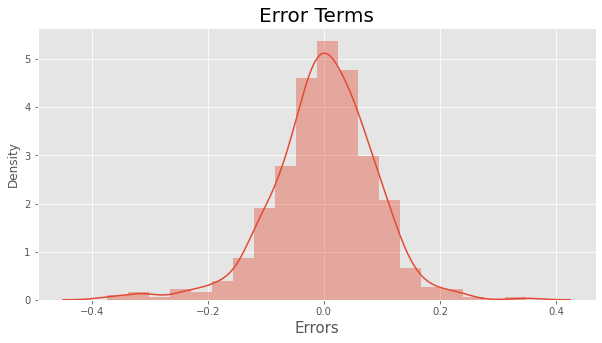

In [70]:
# Plot Histogram for the Error Terms
# Get the y_pred from X_train_new
y_pred = lm_10.predict(X_train_sm)
residual  = y_train - y_pred

plt.figure(figsize = (10,5))
sns.distplot(residual , bins = 20)
plt.title('Error Terms' , fontsize = 20)
plt.xlabel('Errors' , fontsize = 15)
plt.show()

#### Inferences :
1. Error terms are normaly distributed as we can see a bell curve between -0.1 & 0.1
2. As the peak point it centred at '0'.Hence ,the Mean of Error terms is 0

 #### Mean of Residuals is 0

In [71]:
mean_residual = np.mean(residual)
print("Mean of Residuals : {}".format(mean_residual))

Mean of Residuals : -1.9831086663880432e-15


Hence the Mean Residuals is close to 0.0

###  Assumption 2 -  Check for Homoscedasticity

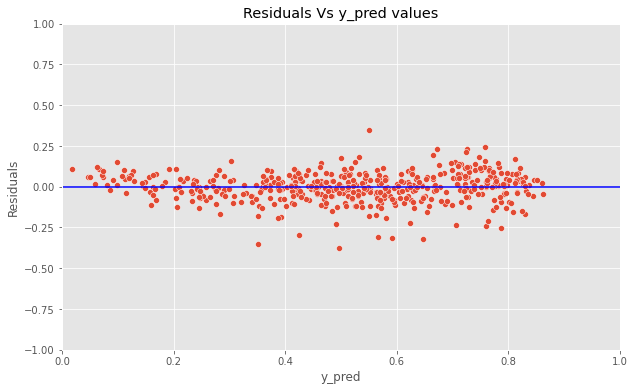

In [72]:
# Check if Residuals have equal or constant variances across the regression line

plt.figure(figsize = (10,6))

plt.xlim(0,1)
plt.ylim(-1 ,1)

sns.scatterplot(y_pred , residual)
sns.lineplot([0,1] , [0,0] , color  = 'blue')

plt.title("Residuals Vs y_pred values")
plt.xlabel("y_pred")
plt.ylabel("Residuals")

plt.show()

#### Inferences:

1. Residuals / error terms have equal or almost equal variance across the regression line.
2. There is no pattern oibserved in the error terms.

### Assumption 3 - Residuals are Independant / No Autocorrelation


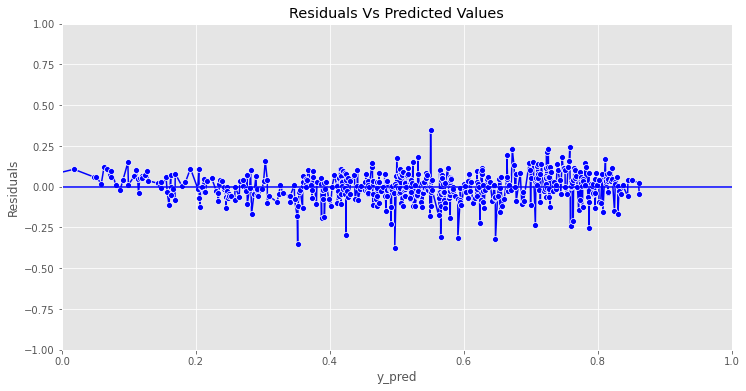

In [73]:
plt.figure(figsize = (12,6))

plt.xlim(0 , 1)
plt.ylim(-1 , 1)

sns.lineplot( y_pred , residual , marker = 'o' , color = 'blue')
sns.lineplot([0,1] , [0,0] , color  = 'blue')

plt.title("Residuals Vs Predicted Values")
plt.xlabel("y_pred")
plt.ylabel("Residuals")

plt.show()

#### Inferences:
1. Residuals & Predicted values do not show any patterns hence there is no autocorrealtion in the error terms/Residuals.

### Assumption 4 - No Multicollinearity

In [74]:
# From the final model lm_10, all the VIF values of the significant features in the linear model are less than 10.
calc_vif(X_train_rfe)

,Features,VIF
2,temp,5.02
10,relative_temp_hum,4.07
3,windspeed,4.00
6,season_Spring,2.37
0,yr,2.06
9,weathersit_Mist_Cloudy,1.70
7,season_Winter,1.67
4,mnth_July,1.40
5,mnth_September,1.24
8,weathersit_Light_Snow,1.17


#### Inferences:
Hence, VIF values are < 10 indicates that there is no correlation between the independent variables & no multicollinearity exists in the model.

#### Probability Plot

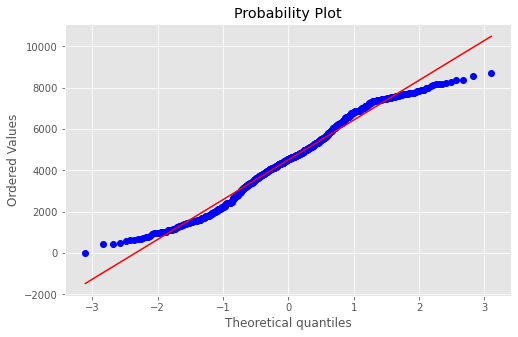

In [75]:
# Probability plot gives the best fit line for the dependant variable

from scipy import stats

plt.figure(figsize = (8,5))
stats.probplot(bike_data['cnt'].tolist() , dist = 'norm', plot = plt)
plt.show()

#### Inferences:
Here we can obseerve the best fit line that passes through the 'cnt' variable data.

#### qq-plot - Quantile - Quantile Plot

<Figure size 1080x720 with 0 Axes>

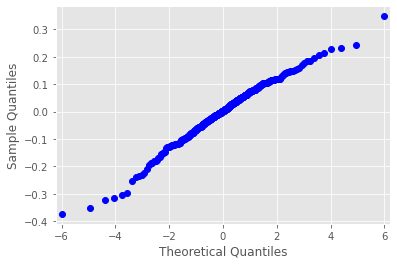

In [76]:
import statsmodels.api as sm
import pylab

plt.figure(figsize = (15,10))
sm.qqplot(residual ,stats.t ,distargs = (4,))
plt.show()

#### Inferences :
qq-plot is Quatile -Quantile Plot, helps to check if the test & train data are both normally distributed.

## Step 7 : Making Predictions 

### Step 7.1 : Applying Scaling on the Test set

In [77]:
# List the numerical variables to apply scaling 

continuous_variables = ['temp' ,'relative_temp', 'hum' , 'windspeed' ,'cnt']

# Apply the scaler Transform of the test data 
df_test[continuous_variables] = scaler.transform(df_test[continuous_variables])

### Step 7.2 : Diving into X_test & y_test set

In [78]:
# Create target or dependent variable y_test = 'cnt'  & X_test = all independent variables 
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
# Lets use our last model to make predictions
# Create X_test_new by dropping variables from X_test_new which are deleted in the final model

X_test['relative_temp_hum'] = (X_test['temp'] - X_test['hum']).abs()
X_test = X_test.drop(['hum'] , axis = 1)

X_test_new = X_test[X_train_rfe.columns]

# Add a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions 
y_pred = lm_10.predict(X_test_new)

## Step 8: Model Evaluation

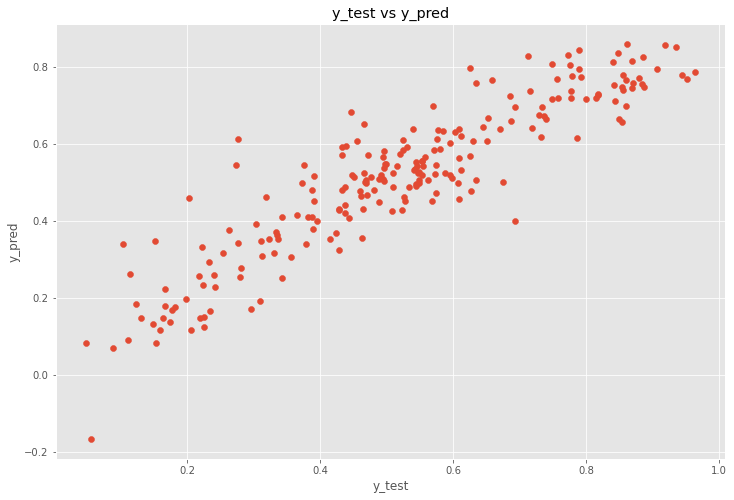

In [80]:
# plotting scatter plot between y_test & y_pred to understand the spread
plt.figure(figsize = (12,8))
plt.scatter(y_test ,y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##### Inferences
We can observe that all the y test & y_predicted values have a positive linear relationship between them.

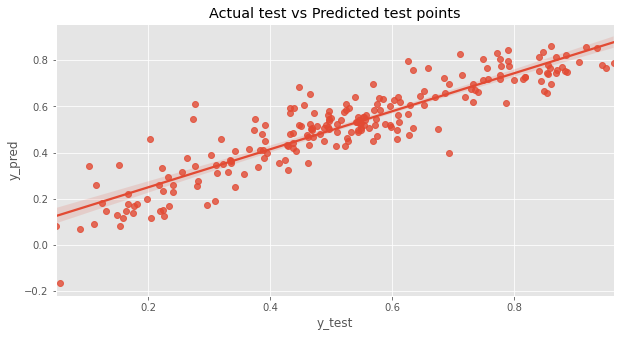

In [81]:
# Regression plot 
plt.figure(figsize = (10,5))
sns.regplot(y_test,y_pred)
plt.title("Actual test vs Predicted test points")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Step 8.1 : Check Mean Squared Error

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error( y_test , y_pred)
print("Mean_Squared_Error : ", mse)

Mean_Squared_Error :  0.008353550035625034


### Step 8.2 :  R-Squared of Test set

In [83]:
r_squared = r2_score(y_test, y_pred)
print("R-Squared Value :" , r_squared)

R-Squared Value : 0.8241202674309017


### Step 8.3 : Difference in Train & Test  r2 score 

In [84]:
# R-squared from lm_10 is = 0.846
r2_train = 0.846
difference = (r2_train - r_squared) * 100
print("The difference in R-squared of the train & test set is : ",difference) 

The difference in R-squared of the train & test set is :  2.1879732569098254


## Step 9 : Recommendations to the Company